In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import manifold 
from mpl_toolkits.mplot3d import Axes3D
import csv
import sklearn
import seaborn as sns
import os 
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#VERİ SETİ PATH OLARAK EKLENDİ.
df=pd.read_csv('data.csv')

## VERİ SETİ İNCELEMESİ

In [3]:
col = df.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

### Önişleme Olmadan Dataframe istatistikleri

In [5]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [6]:
#ID ve sadece ilk 11 features DataFrame'e aktarıldı.
df=df.drop(['id'],axis=1)
df=df.drop(df.iloc[:,11:32],axis=1)

In [7]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [8]:
#Veri seti içerisindeki tüm satır ve sütunlardaki null değerlerinin sayısını kontol ettik.
def num_missing(a):
  return sum(a.isnull())

print("NULL Değer Sayısı:")
print(df.apply(num_missing, axis=0))

NULL Değer Sayısı:
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


### İYİ HUYLU VE KANSER ÖRNEKLEM SAYILARI

B    357
M    212
Name: diagnosis, dtype: int64


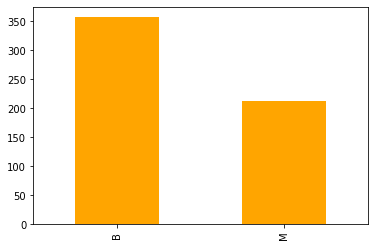

In [9]:

df['diagnosis'].value_counts().plot(kind='bar',color='orange')
print(df['diagnosis'].value_counts())
plt.show()

### 11-32 Sütunların Listeye Aktarımı

In [10]:
#İLK 10 Özellik dışındaki ona bağlı olan diğer matematiksel istatistiklerin başka bir listeye aktarılması işlemi.
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

In [11]:
mean= (df[1:11])
se= (df[11:20])
worst=(df[21:31])

In [12]:
#Örnek // > ortalama istatistikleri
features_mean


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

### KORELASYON TABLOSUNUN KURULMASI VE İNCELENMESİ

<AxesSubplot:>

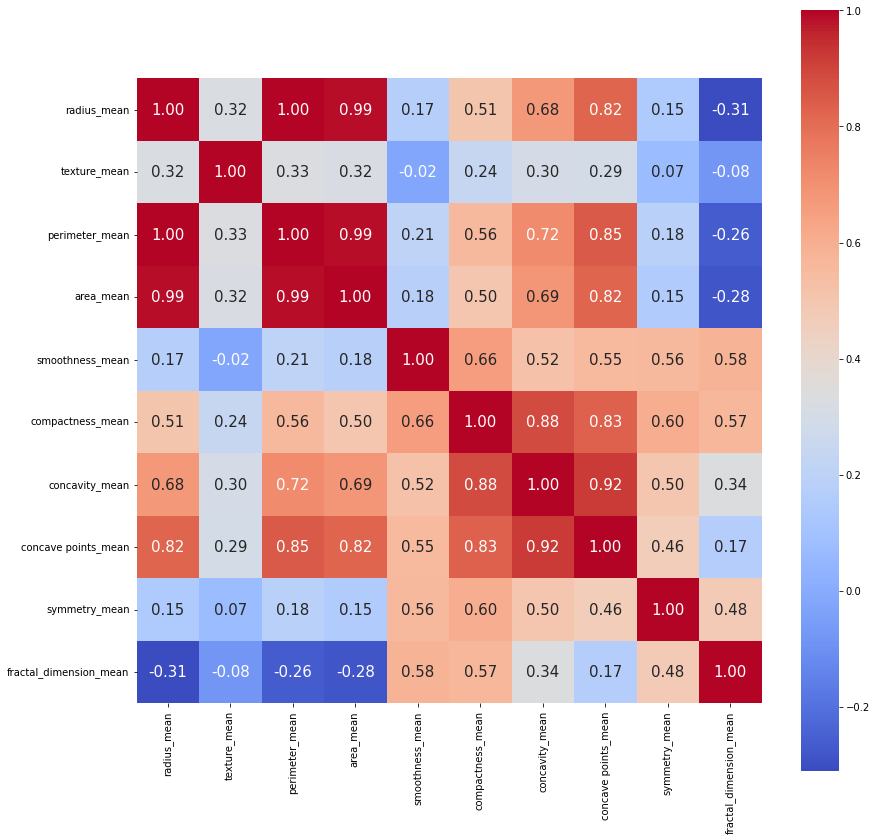

In [13]:
corr = df[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 

In [14]:
#Dataframe B ve M oranlarını değişkene atadık. (histogram için)
fig= px.histogram(df, x='diagnosis',color='diagnosis', barmode='group')

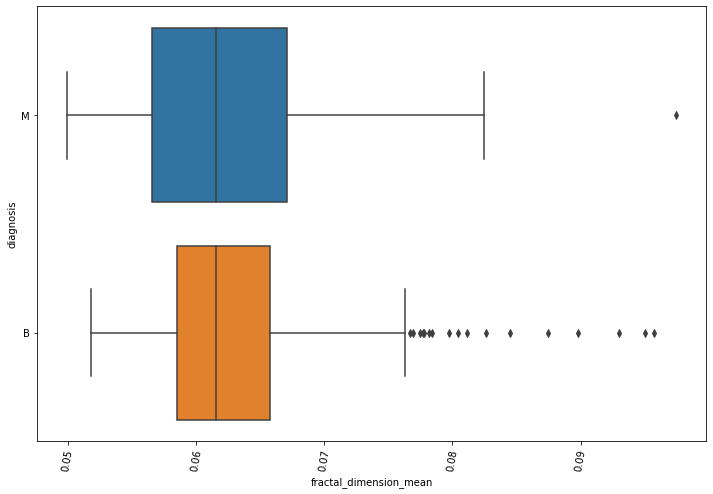

In [15]:
#Tek negatif ilişki bulunan parametrenin fractal dimension olduğu görülür.
plt.figure(figsize=(12,8))
sns.boxplot(x = "fractal_dimension_mean", y = "diagnosis", data= df)
plt.xticks(rotation=80)
plt.show()

### PARAMETRELERİN BÜYÜKLÜĞÜNE GÖRE KANSER SONUCUNU NUFÜSA GÖRE SINIFLAMA

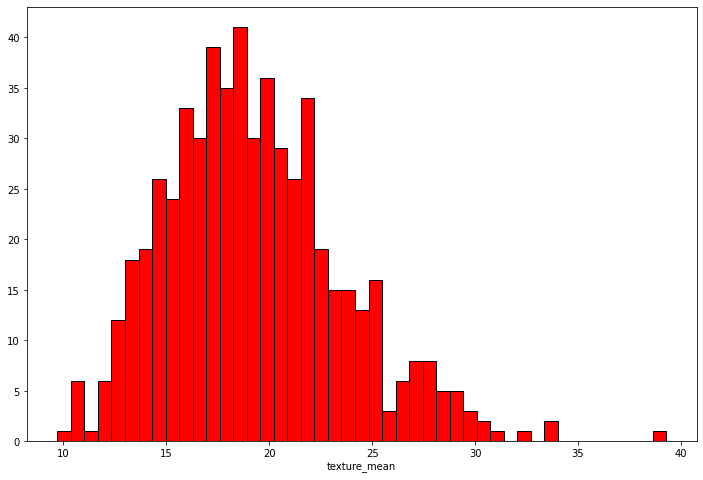

In [16]:
#Parametrenin adı değiştirilerek tüm parametrelerin sonucu görülebilmektedir.
plt.figure(figsize=(12,8))
df1 = df[df.texture_mean <1000]
plt.hist(df1.texture_mean, bins = int(180/4), edgecolor='black', color = 'red')
plt.title('')
plt.xlabel('texture_mean')
plt.show()

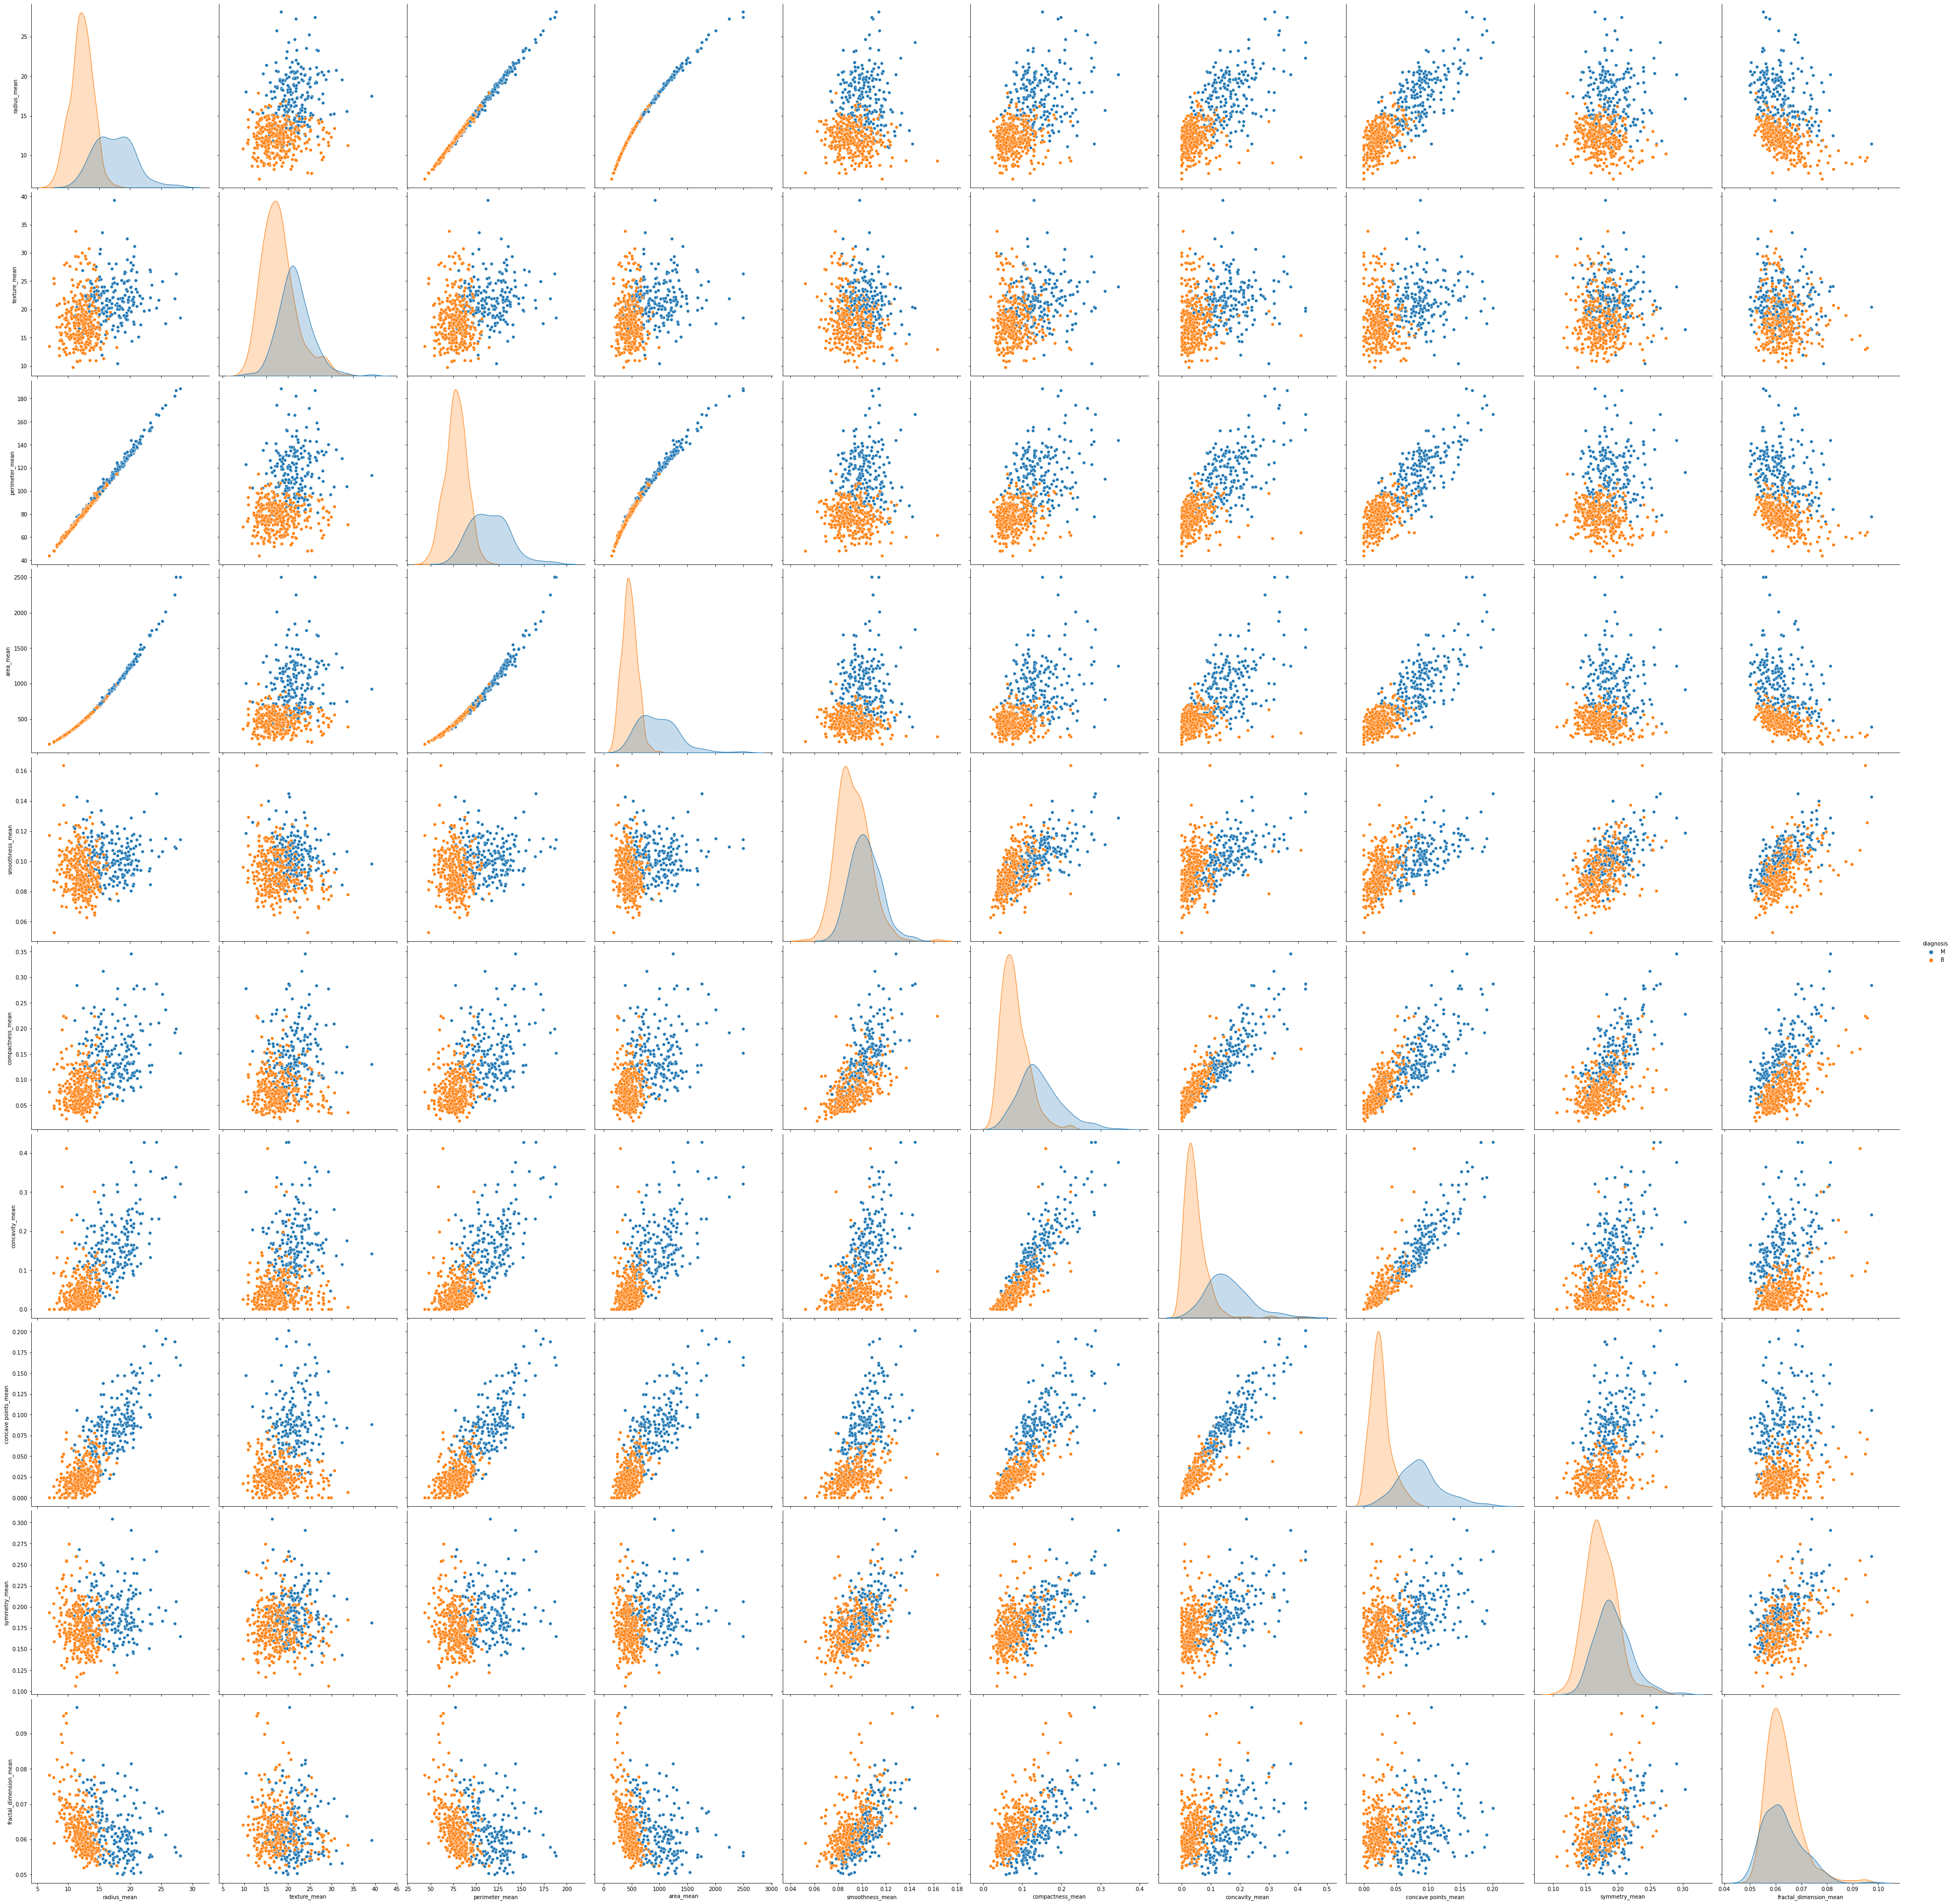

In [17]:
sns.pairplot(df, hue='diagnosis', height=5, vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

In [18]:
X=df.iloc[:,1:]
y=df['diagnosis'].copy()

### BENIGN VE MALIGNANT >KATEGORİK DEĞİŞKENDEN SAYISAL DEĞİŞKENE ÇEVİRME

In [19]:
#benign class=0 , Malignan=1
y=y.map({'B':0,'M':1})
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## TEST - TRAİN VERİ SETİNİ AYIRMA

In [20]:
#Yüzde 70'e 30 oranında test ve eğitim verisi olarak ayırdık.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [21]:
print(X_train.var())

radius_mean                   12.235069
texture_mean                  20.377333
perimeter_mean               578.782970
area_mean                 123307.382973
smoothness_mean                0.000191
compactness_mean               0.002477
concavity_mean                 0.006056
concave points_mean            0.001494
symmetry_mean                  0.000759
fractal_dimension_mean         0.000043
dtype: float64


## STANDARDSCALER İŞLEMİ

In [22]:
#Veri seti ayrıldıktan sonra modeli çalıştırmadan önce tüm veriler max ve min değerlere, kendi içerisindeki dinamiğe göre scale edildi (ölçeklendi).
from sklearn.preprocessing import StandardScaler
scale=StandardScaler(copy=True, with_mean=True,with_std=True)
#Eğitim verisine scale için öğrenme gerçekleştirilmesi sağladnı. Fit--
scale.fit(X_train)
#Fit edildikten sonra transform işlemi için başka bir değişkene aktarıldı.
X_train_std=scale.transform(X_train)

In [23]:
print(X_train_std.var())

1.0


In [24]:
#from pickle import dump
#dump(scale,open('scale.pkl','wb'))

In [25]:
#Fit edilen veri test verisi üzerinde transform edilerek aynı formata çekilmesi sağlandı.
X_test_std=scale.transform(X_test)
X_test_std

array([[-1.32625070e-01,  6.98080346e-01,  5.11240647e-02, ...,
         8.06947681e-01,  9.63385406e-01,  2.17595752e+00],
       [-5.41960283e-01, -9.82019445e-02, -6.03121749e-01, ...,
        -1.05068757e+00, -9.63239269e-01, -4.66570391e-01],
       [-2.81474238e-01,  1.28364727e+00, -3.44253494e-01, ...,
        -7.36095365e-01, -6.72427998e-01, -1.01576589e+00],
       ...,
       [-1.27733243e+00, -9.14446743e-01, -1.18994528e+00, ...,
         7.63430603e-01,  2.70461789e+00,  4.63136342e+00],
       [ 2.60390965e+00,  1.59861129e+00,  2.76882455e+00, ...,
         2.92451976e+00,  1.43958886e+00, -3.45163165e-02],
       [-4.96160539e-01,  9.47689726e-02, -4.96994088e-01, ...,
        -4.69035204e-01, -8.35351725e-02, -4.08997328e-03]])

# MODEL KURULUMLARI

## SVC Model

In [26]:
#------------SVC MODEL-----------
from sklearn.svm import SVC

SVCmodel=SVC(C=0.9, gamma=0.063, kernel='rbf')
SVCmodel=SVCmodel.fit(X_train_std,y_train)
SVCmodel.score(X_test_std,y_test)

0.9473684210526315

### SVC Model >>CrossValidation

In [27]:
from sklearn.model_selection import cross_val_score
cval=cross_val_score(SVCmodel,X_train_std,y_train, cv=10)
cvalm=cross_val_score(SVCmodel,X_train_std,y_train, cv=10).mean()
cvalm

0.9498076923076922

### SVC Model >>Confusion Matrix

[[107   0]
 [  9  55]]


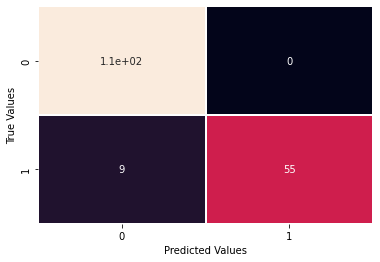

In [55]:
from sklearn.metrics import confusion_matrix
predictedSVC=SVCmodel.predict(X_test_std)
matrixSVC=confusion_matrix(y_test,predictedSVC)
sns.heatmap(matrixSVC,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixSVC)

### SVC Model >>>Metrics

In [57]:
from sklearn.metrics import classification_report
print('SVCMODEL METRICS')
reportSVC=classification_report(y_test,predictedSVC)
print(reportSVC)

SVCMODEL METRICS
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       107
           1       1.00      0.86      0.92        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



## GradientBoosting MODEL

In [28]:
#------------GradientBoosting MODEL-----------
from sklearn.ensemble import GradientBoostingClassifier

GBmodel=GradientBoostingClassifier(n_estimators=5, learning_rate=1.0, max_depth=1, random_state=0)
GBmodel=GBmodel.fit(X_train_std,y_train)
GBmodel.score(X_test_std,y_test)

0.9064327485380117

### GradientBoosting MODEL >>CrossValidation

In [29]:
from sklearn.model_selection import cross_val_score
cval=cross_val_score(GBmodel,X_train_std,y_train, cv=10)
cvalm=cross_val_score(GBmodel,X_train_std,y_train, cv=10).mean()
cvalm

0.939551282051282

In [30]:
print("Eğitim verisi doğruluğu",metrics.accuracy_score(y_train,GBmodel.predict(X_train_std)))
print("Test verisi doğruluğu",metrics.accuracy_score(y_test,y_test))

Eğitim verisi doğruluğu 0.9673366834170855
Test verisi doğruluğu 1.0


### GBModel >> Confusion Matrix

[[102   5]
 [ 11  53]]


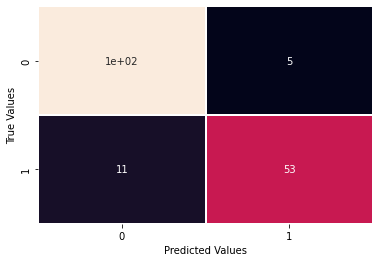

In [56]:
predictedGB=GBmodel.predict(X_test_std)
matrixGB=confusion_matrix(y_test,predictedGB)
sns.heatmap(matrixGB,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixGB)

### GBModel >> Metrics

In [58]:
print('GBMODEL METRICS')
reportGB=classification_report(y_test,predictedGB)
print(reportGB)

GBMODEL METRICS
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       107
           1       0.91      0.83      0.87        64

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



## K-Nearest Neighbors MODEL

In [31]:
from sklearn.neighbors import KNeighborsClassifier

k=7
KnnModel=KNeighborsClassifier(n_neighbors=k).fit(X_train_std,y_train)
KnnModel.score(X_test_std,y_test)

0.9473684210526315

### K-Nearest Neighbors MODEL >CrossValidation

In [32]:
from sklearn.model_selection import cross_val_score
cval=cross_val_score(KnnModel,X_train_std,y_train, cv=10)
cvalm=cross_val_score(KnnModel,X_train_std,y_train, cv=10).mean()
cvalm

0.939551282051282

In [33]:
y_hat=KnnModel.predict(X_test_std)
y_hat[0:20]

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [34]:
print("Eğitim verisi doğruluğu",metrics.accuracy_score(y_train,KnnModel.predict(X_train_std)))
print("Test verisi doğruluğu",metrics.accuracy_score(y_test,y_hat))

Eğitim verisi doğruluğu 0.9447236180904522
Test verisi doğruluğu 0.9473684210526315


### KNN >>>> K Parametresini Belirleme

In [35]:
# 1 ve 10 arasındaki K parametresi denendi, grafikten incelendi ve ona göre seçim yapıldı.
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[]

for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train_std,y_train)
    yhat=neigh.predict(X_test_std)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.90643275, 0.9122807 , 0.93567251, 0.92397661, 0.93567251,
       0.93567251, 0.94736842, 0.93567251, 0.94152047])

C:\Users\Berk\AppData\Local\Temp\ipykernel_16720\1526290566.py:4: UserWarning:

Legend does not support 'A' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Berk\AppData\Local\Temp\ipykernel_16720\1526290566.py:4: UserWarning:

Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Berk\AppData\Local\Temp\ipykernel_16720\1526290566.py:4: UserWarning:

Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\Berk\AppData\Local\Temp\ipykernel_16720\1526290566.py:4: UserWarning:

Legend does not support 'r' instances.
A proxy artist may be used instead.
Se

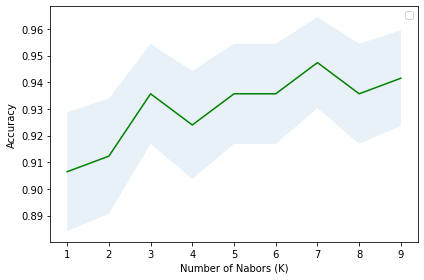

In [36]:
#1 ve 10 arasındaki K parametresi denendi, grafikten incelendi ve ona göre seçim yapıldı.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+ 1*std_acc,alpha=0.1)
plt.legend('Accuracy','+/-3xstd')
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [37]:
#En yüksek doğruluğunun hangi k parametresinde olduğu belirlendi.
print("En yüksek doğruluk=" ,mean_acc.max(),"K=",mean_acc.argmax()+1,"olduğunda gerçekleşti")

En yüksek doğruluk= 0.9473684210526315 K= 7 olduğunda gerçekleşti


### KNN >> Confusion Matrix

[[104   3]
 [  6  58]]


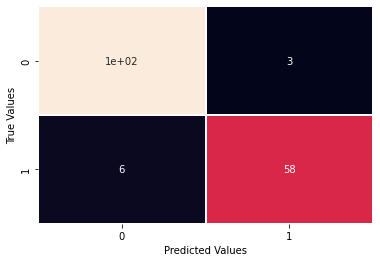

In [60]:
predictedKNN=KnnModel.predict(X_test_std)
matrixKNN=confusion_matrix(y_test,predictedKNN)
sns.heatmap(matrixKNN,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixKNN)

### KNN >>Metrics

In [61]:
print('KNN METRICS')
reportKNN=classification_report(y_test,predictedKNN)
print(reportKNN)

KNN METRICS
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



## RANDOM FOREST MODEL

In [38]:
from sklearn.ensemble import RandomForestClassifier
RfModel = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
RfModel.fit(X_train_std, y_train)
RfModel.score(X_test_std,y_test)

0.9005847953216374

[[100   7]
 [ 10  54]]


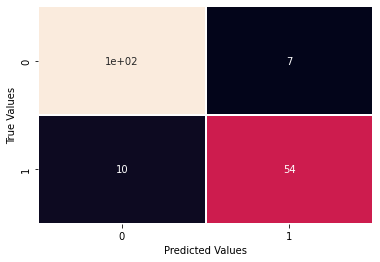

In [63]:
predictedRF=RfModel.predict(X_test_std)
matrixRF=confusion_matrix(y_test,predictedRF)
sns.heatmap(matrixRF,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixRF)

In [64]:
print('RandomForest METRICS')
reportRF=classification_report(y_test,predictedRF)
print(reportRF)

RandomForest METRICS
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       107
           1       0.89      0.84      0.86        64

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



## NAIVE BAYES MODEL

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train.ravel())
gnb.score(X_test_std,y_test)

0.8830409356725146

[[99  8]
 [12 52]]


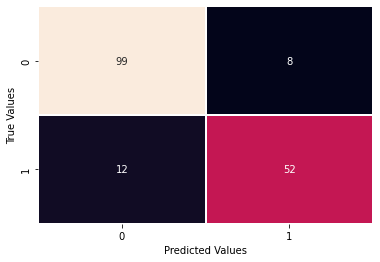

In [66]:
predictedGNB=gnb.predict(X_test_std)
matrixGNB=confusion_matrix(y_test,predictedGNB)
sns.heatmap(matrixGNB,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixGNB)

In [68]:
print('Naive Bayes METRICS')
reportGNB=classification_report(y_test,predictedGNB)
print(reportGNB)

Naive Bayes METRICS
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       107
           1       0.87      0.81      0.84        64

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



In [40]:
results=cross_val_score(SVCmodel, X_train_std,y_train,cv=10,scoring='roc_auc')
print("AUC:",results.mean())

AUC: 0.991657142857143


In [69]:
results=cross_val_score(gnb, X_train_std,y_train,cv=10,scoring='roc_auc')
print("AUC:",results.mean())

AUC: 0.9820952380952381


In [70]:
results=cross_val_score(RfModel, X_train_std,y_train,cv=10,scoring='roc_auc')
print("AUC:",results.mean())

AUC: 0.9848190476190476


In [73]:
results=cross_val_score(KnnModel, X_train_std,y_train,cv=10,scoring='roc_auc')
print("AUC:",results.mean())

AUC: 0.982352380952381


In [74]:
results=cross_val_score(GBmodel, X_train_std,y_train,cv=10,scoring='roc_auc')
print("AUC:",results.mean())

AUC: 0.9816857142857144


In [44]:
columns=["radius_mean", "texture_mean", "perimeter_mean", "area_mean" ,"smoothness_mean" ,"compactness_mean", "concavity_mean" ,"concave points_mean", "symmetry_mean" ,"fractal_dimension_mean"]
datax= pd.DataFrame(index = ["10"],columns=columns) 
#9.0,14.4,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833

In [45]:

datax.loc["10","radius_mean"]=19.69
datax.loc["10","texture_mean"]=21.25
datax.loc["10","perimeter_mean"]=130
datax.loc["10","area_mean"]=1203
datax.loc["10","smoothness_mean"]=0.1096
datax.loc["10","compactness_mean"]=0.1599
datax.loc["10","concavity_mean"]=0.1974
datax.loc["10","concave points_mean"]=0.1279
datax.loc["10","symmetry_mean"]=0.2069
datax.loc["10","fractal_dimension_mean"]=0.05999



In [46]:
#datax.loc["10","radius_mean"]=input()
#datax.loc["10","texture_mean"]=input()
#datax.loc["10","perimeter_mean"]=input()
#datax.loc["10","area_mean"]=input()
#datax.loc["10","smoothness_mean"]=input()
#datax.loc["10","compactness_mean"]=input()
#datax.loc["10","concavity_mean"]=input()
#datax.loc["10","concave points_mean"]=input()
#datax.loc["10","symmetry_mean"]=input()
#datax.loc["10","fractal_dimension_mean"]=input()

In [47]:
# def Sonuc(): 
#   datax.loc["10","radius_mean"]=input("Radius_mean: ")
#   datax.loc["10","texture_mean"]=input("texture_mean: ")
#   datax.loc["10","perimeter_mean"]=input("perimeter_mean: ")
#   datax.loc["10","area_mean"]=input("area_mean: ")
#   datax.loc["10","smoothness_mean"]=input("smoothness_mean: ")
#   datax.loc["10","compactness_mean"]=input("compactness_mean: ")
#   datax.loc["10","concavity_mean"]=input("concavity_mean: ")
#   datax.loc["10","concave points_mean"]=input("concave points_mean: ")
#   datax.loc["10","symmetry_mean"]=input("symmetry_mean: ")
#   datax.loc["10","fractal_dimension_mean"]=input("fractal_dimension_mean: ")
#   y_datax=[0]  
#   datax_std=scale.transform(datax)
#   print(datax_std)
#   #datax_std_pca=pca1.transform(datax_std)
#   result=SVCmodel.predict(datax_std)
#   result2=GBmodel.predict(datax_std)
#   #report2=classification_report(y_data,result)
#   #print(report2)
#   print("        TEŞHİS SONUCU \n")
#   print(result)
#   print(result2)
#   if result==[1]:
#     print("SVCmodel--KÖTÜ HUYLU KANSER HÜCRESİ-MALIGNANT")
#   else:
#     print("SVCmodel--İYİ HUYLU NODÜL-BENIGN")
#   if result2==[1]:
#     print("GBmodel--KÖTÜ HUYLU KANSER HÜCRESİ-MALIGNANT")
#   else:
#     print("GBmodel--İYİ HUYLU NODÜL-BENIGN")
  

In [48]:
# 19.69,
# 21.25,
# 130,
# 1203,
# 0.1096,
# 0.1599,
# 0.1974,
# 0.1279,
# 0.2069,
# 0.05999,
# 0.7456,
# 0.7869,
# 4.585,
# 94.03,
# 0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758

In [49]:
datax_std=scale.transform(datax)
datax_std

array([[ 1.5734154 ,  0.39642466,  1.5660444 ,  1.54631148,  0.96172902,
         1.13256293,  1.39792404,  2.0412267 ,  0.96338541, -0.38441926]])

In [50]:
result=SVCmodel.predict(datax_std)
result

array([1], dtype=int64)

In [51]:
print(scale.mean_)

[1.41933216e+01 1.94627387e+01 9.23716080e+01 6.60692965e+02
 9.63226382e-02 1.03598317e-01 8.87495955e-02 4.90973543e-02
 1.80397990e-01 6.25168844e-02]


In [52]:
datax_std

array([[ 1.5734154 ,  0.39642466,  1.5660444 ,  1.54631148,  0.96172902,
         1.13256293,  1.39792404,  2.0412267 ,  0.96338541, -0.38441926]])

In [53]:
print(scale.mean_)

[1.41933216e+01 1.94627387e+01 9.23716080e+01 6.60692965e+02
 9.63226382e-02 1.03598317e-01 8.87495955e-02 4.90973543e-02
 1.80397990e-01 6.25168844e-02]


In [54]:
#import pickle
#pickle.dump(SVCmodel,open("SVCmodel2.pkl","wb"))